In [16]:
from tqdm import tqdm, trange
from time import sleep

In [17]:
import pandas as pd
import numpy as np

In [19]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

consider setting layer size to a multiple of 4 for greater performance
C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


In [23]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [24]:
# 어간 단위로 쪼갠 컬럼의 각 성분들을 모두 리스트형으로 반환하는 함수
def string_to_list (column):
    lyrics = []
    for string in list(column):
        temp = ''
        ls = []
        for l in string:
            if l == '[' or l == "'" or l == ']':
                l = ''
            temp += l
        raw_list = temp.split(',')
        for word in raw_list:
            word = word.strip()
            ls.append(word)
        lyrics.append(ls)
    return lyrics

In [25]:
# data = ["I love machine learning. Its awesome.",
#         "I love coding in python",
#         "I love building chatbots",
#         "they chat amagingly well"]
data = ls2
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

NameError: name 'ls2' is not defined

# **Doc2Vec**

아래와 같은 모듈을 설치해서 사용하세요(Anaconda prompt창에서 설치)  
```{.python}
pip install tensorflow
pip install keras
pip install gensim
pip install nltk
```

In [26]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

### 1. 데이터를 불러옴(doodle_0821 파일을 불러옴)

In [193]:
hi = pd.read_csv('for Doc2Vec.csv', engine = 'python')
hi.head()

,Unnamed: 0,TITLE,ARTIST,LYRICS,BoW,new_BoW,for_Train
0,0,가거라 삼팔선,남인수,아 산이 막혀\n\n 못오시나요아 물이 막혀\n\n ...,"['산', '물', '고향', '고향땅', '땅', '남북', '원한', '천리길'...","['못', '못', '다', '함께', '이', '산', '물', '고향', '땅'...",못 못 다 함께 이 산 물 고향 땅 남북 원한 천리길 꿈 꿈 삼팔선 때 눈 때 보따...
1,1,가는 봄 오는 봄,최숙자,하늘마저 울던 그날에\n\n 어머님을 이별을 하고원한의 십년 세월\n\n ...,"['하늘', '그날', '어머님', '이별', '원한', '십', '십년', '년'...","['하늘', '그날', '어머님', '이별', '원한', '세월', '눈물', '속...",하늘 그날 어머님 이별 원한 세월 눈물 속 나무 돌뿌리 어머님 곳 길 비둘기 그날 ...
2,2,가는 세월,서유석,가는 세월 그 누구가\n\n 막을 수가 있나요흘러가는 시냇물을\n\n ...,"['세월', '누구', '수', '시냇물', '아가', '어른', '슬픔', '행복...","['다', '다', '그', '이', '이', '세월', '시냇물', '아가', '...",다 다 그 이 이 세월 시냇물 아가 어른 슬픔 행복 속 요새 하늘 달이 해 산천 초...
3,3,가버린 당신,최진희,잊는다고 생각하면\n\n 또 다시 당신 생각미웁다고 생각하면\n\n ...,"['생각', '당신', '얼굴', '사람', '모두', '부', '사랑', '순간'...","['또', '다시', '오히려', '모두', '왜', '이렇게', '모두', '왜'...",또 다시 오히려 모두 왜 이렇게 모두 왜 이렇게 모두 그 그 그 생각 생각 생각 얼...
4,4,가을비 우산속,최 헌,그리움이 눈처럼\n\n 쌓인 거리를나 혼자서 걸었네\n\n ...,"['그리움', '눈', '거리', '나', '혼자', '미련', '미련때문', '때...","['왜', '이다지', '또', '다시', '언젠가', '언젠가', '그', '그'...",왜 이다지 또 다시 언젠가 언젠가 그 그 그 그리움 눈 거리 혼자 미련 세월 얼굴 ...


In [196]:
lyrics = string_to_list(hi.new_BoW)

### 2. 문자열로 취급되었던 new_BoW컬럼을 리스트로 변환함

In [138]:
# 어간 단위로 쪼갠 컬럼의 각 성분들을 모두 리스트형으로 반환하는 함수
def string_to_list (column):
    lyrics = []
    for string in list(column):
        temp = ''
        ls = []
        for l in string:
            if l == '[' or l == "'" or l == ']':
                l = ''
            temp += l
        raw_list = temp.split(',')
        for word in raw_list:
            word = word.strip()
            ls.append(word)
        lyrics.append(ls)
    return lyrics

In [139]:
ls = string_to_list(hi.new_BoW)

### 3. 학습형태에 맞게 자료의 형태를 바꿔줌

In [197]:
ls_for_train = []
for song in lyrics:
    temp = ' '.join(song)
    ls_for_train.append(temp)

In [199]:
data = ls_for_train
# 최종적으로 학습에 참여할 데이터
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

### 4. 학습

In [236]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
max_epochs = 100
vec_size = 100
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=20,
                dm =1)
  
model.build_vocab(tagged_data)

with tqdm(total = max_epochs) as pbar:
    for epoch in range(max_epochs):
        model.train(tagged_data,
                    total_examples=model.corpus_count,
                    epochs=model.iter)
        # decrease the learning rate
        model.alpha -= 0.0002
        # fix the learning rate, no decay
        model.min_alpha = model.alpha
        pbar.update(1)
model.save("d2v_100d_min20.model")
print("Model Saved")

C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
100%|██████████| 100/100 [07:26<00:00,  4.28s/it]
C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model Saved


In [210]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v_3d.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize(mc_the_max.lower()) # 노래가사를 '하나의' 문자열로 넣어서 예측해볼 수 있음(예: 엠씨더맥스 가사)
    # 참고: lower()함수는 영어 문자열을 소문자 처리하는 함수임
v1 = model.infer_vector(test_data)
print("벡터 변환 결과", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar('1')
print(f'유사곡: {similar_doc}')

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['0']) # 인덱스에 해당하는 노래임
type(str(0))

C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


벡터 변환 결과 [0.422342   0.3052761  0.62122357]
유사곡: [('4644', 0.999961256980896), ('4075', 0.9999428987503052), ('1059', 0.9998735189437866), ('5895', 0.9998564720153809), ('1992', 0.9998456239700317), ('1999', 0.9998241662979126), ('3544', 0.9998176097869873), ('3958', 0.9997686743736267), ('2556', 0.9997643232345581), ('1762', 0.999756395816803)]
[ 0.43816546 -0.02088062  0.71172255]


str

In [ ]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v_3d.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize(mc_the_max.lower()) # 노래가사를 '하나의' 문자열로 넣어서 예측해볼 수 있음(예: 엠씨더맥스 가사)
    # 참고: lower()함수는 영어 문자열을 소문자 처리하는 함수임
v1 = model.infer_vector(test_data)
print("벡터 변환 결과", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar('1')
print(f'유사곡: {similar_doc}')

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['0']) # 인덱스에 해당하는 노래임
type(str(0))

In [237]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v_100d_min20.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize(final_snow.lower()) # 노래가사를 '하나의' 문자열로 넣어서 예측해볼 수 있음(예: 엠씨더맥스 가사)
    # 참고: lower()함수는 영어 문자열을 소문자 처리하는 함수임
v1 = model.infer_vector(test_data)
print("벡터 변환 결과", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar('1')
print(f'유사곡: {similar_doc}')

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['0']) # 인덱스에 해당하는 노래임
type(str(0))

C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


벡터 변환 결과 [-0.23127636 -1.2809142  -0.19805418 -1.5682764   0.2830415  -0.22777793
  1.6550456   0.14006054  0.8396399   0.9300745   1.3082443   1.4644369
 -0.5144633   0.50926757 -0.10920749  0.8889903   0.2592842   0.33941346
 -0.08534301 -0.11527909 -1.594225   -1.748117    0.83552355 -1.0487139
  0.80811703  0.2659256   0.87161654  0.11088771  0.07835013 -0.8793853
  0.9379695   0.35592258 -0.27158585  0.29956567  0.12726375 -0.95699817
 -0.5581729  -0.6823098  -0.02238677  0.25137404 -2.0075724  -0.22468568
 -2.8241997   0.5722943  -0.15099452 -0.05984147 -0.20367625 -0.0356614
  0.04621149 -1.6659268  -0.3792426  -0.12351244  0.7749229  -1.4368501
 -1.4778707  -1.9870347   2.1044075  -0.24835932  1.1412901   1.2760637
 -0.25310826 -0.11566654 -0.5547965  -1.1888605   0.22825229 -0.30786404
  0.17594929 -0.00674867 -0.12683986 -0.07901752  1.0722644  -0.41080296
 -0.35882926  0.24344437 -0.40724126  0.40333265  1.3339913   0.0646222
 -1.4055237  -0.6302846  -0.672832    0.65609676 

str

In [242]:
type(model.docvecs['1'])

numpy.ndarray

In [244]:
vectors = []
with tqdm(total = 6997) as pbar:
    for song_num in range(6997):
        vectors.append(model.docvecs[f'{song_num}'])
        pbar.update(1)

100%|██████████| 6997/6997 [00:00<00:00, 369239.76it/s]


In [249]:
hi['dim100'] = vectors

In [250]:
hi.dim100.head()

0    [2.45201, -1.0513871, 2.667805, -5.954004, -3....
1    [-5.20143, -2.4041064, 1.7377362, -0.69061226,...
2    [-1.1591816, -7.5199018, 3.290427, 2.4997444, ...
3    [-5.846836, -3.6653168, -0.22756165, 1.278359,...
4    [-3.4018734, -3.092457, -4.62092, -2.0401673, ...
Name: dim100, dtype: object

In [252]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
XD = pca.fit_transform(vectors
XD

array([[  9.67760064,  -1.54802055,   2.72085932],
       [  5.87137957,   7.6676015 ,   0.58408345],
       [  7.90359344,   1.89500159,  -3.40967139],
       ...,
       [  5.44945512, -10.0651884 ,  -5.22273913],
       [  7.00034679,  -8.35876389,   0.73760376],
       [ -4.03086086,  -3.99295809,   3.85265877]])

In [253]:
pca2 = PCA(n_components=0.95)
XD = pca.fit_transform(vectors)

In [ ]:
XD.

In [268]:
temp = list(XD)

In [270]:
temp[0][0]

9.618243171905394

In [115]:
mv = pd.read_csv('PCA_100_to_3(minwords_20).csv', engine = 'python')
mv.head()

,TITLE,ARTIST,LYRICS,BoW,new_BoW,for_Train,dim100,PCA: 100 to 3
0,가거라 삼팔선,남인수,아 산이 막혀\n\n 못오시나요아 물이 막혀\n\n ...,"['산', '물', '고향', '고향땅', '땅', '남북', '원한', '천리길'...","['못', '못', '다', '함께', '이', '산', '물', '고향', '땅'...",못 못 다 함께 이 산 물 고향 땅 남북 원한 천리길 꿈 꿈 삼팔선 때 눈 때 보따...,[ 2.45201 -1.0513871 2.667805 -5.954004...,[ 9.61824317 -1.62371502 -2.49943473]
1,가는 봄 오는 봄,최숙자,하늘마저 울던 그날에\n\n 어머님을 이별을 하고원한의 십년 세월\n\n ...,"['하늘', '그날', '어머님', '이별', '원한', '십', '십년', '년'...","['하늘', '그날', '어머님', '이별', '원한', '세월', '눈물', '속...",하늘 그날 어머님 이별 원한 세월 눈물 속 나무 돌뿌리 어머님 곳 길 비둘기 그날 ...,[-5.20143 -2.4041064 1.7377362 -0.690612...,[ 5.97518393 7.80211343 -0.88455496]
2,가는 세월,서유석,가는 세월 그 누구가\n\n 막을 수가 있나요흘러가는 시냇물을\n\n ...,"['세월', '누구', '수', '시냇물', '아가', '어른', '슬픔', '행복...","['다', '다', '그', '이', '이', '세월', '시냇물', '아가', '...",다 다 그 이 이 세월 시냇물 아가 어른 슬픔 행복 속 요새 하늘 달이 해 산천 초...,[-1.1591816 -7.5199018 3.290427 2.499744...,[7.9281451 1.78103386 3.54540497]
3,가버린 당신,최진희,잊는다고 생각하면\n\n 또 다시 당신 생각미웁다고 생각하면\n\n ...,"['생각', '당신', '얼굴', '사람', '모두', '부', '사랑', '순간'...","['또', '다시', '오히려', '모두', '왜', '이렇게', '모두', '왜'...",또 다시 오히려 모두 왜 이렇게 모두 왜 이렇게 모두 그 그 그 생각 생각 생각 얼...,[-5.846836 -3.6653168 -0.22756165 1.278359...,[-0.59678308 2.41705468 -1.68484531]
4,가을비 우산속,최 헌,그리움이 눈처럼\n\n 쌓인 거리를나 혼자서 걸었네\n\n ...,"['그리움', '눈', '거리', '나', '혼자', '미련', '미련때문', '때...","['왜', '이다지', '또', '다시', '언젠가', '언젠가', '그', '그'...",왜 이다지 또 다시 언젠가 언젠가 그 그 그 그리움 눈 거리 혼자 미련 세월 얼굴 ...,[ -3.4018734 -3.092457 -4.62092 -2.04...,[ 2.82098993 13.72552823 -3.13373569]


In [120]:
mv[['TITLE', 'ARTIST', 'PCA: 100 to 3']].head(15)

,TITLE,ARTIST,PCA: 100 to 3
0,가거라 삼팔선,남인수,[ 9.61824317 -1.62371502 -2.49943473]
1,가는 봄 오는 봄,최숙자,[ 5.97518393 7.80211343 -0.88455496]
2,가는 세월,서유석,[7.9281451 1.78103386 3.54540497]
3,가버린 당신,최진희,[-0.59678308 2.41705468 -1.68484531]
4,가을비 우산속,최 헌,[ 2.82098993 13.72552823 -3.13373569]
5,가을을,패티김,[ 1.35026802 10.62015728 5.84375391]
6,가장 무도회,김완선,[ 4.15760328 -1.36863755 3.12505696]
7,가지 마오,나훈아,[ 8.1454245 1.87177015 -0.61724224]
8,갈대의 순정,박일남,[ 0.82166751 8.24539446 -7.71706531]
9,갈 무 리,나훈아,[-3.82428504 1.30048088 -6.99444895]


In [116]:
mv[['TITLE', 'ARTIST', 'new_BoW', 'dim100']].head(15)

,TITLE,ARTIST,new_BoW,dim100
0,가거라 삼팔선,남인수,"['못', '못', '다', '함께', '이', '산', '물', '고향', '땅'...",[ 2.45201 -1.0513871 2.667805 -5.954004...
1,가는 봄 오는 봄,최숙자,"['하늘', '그날', '어머님', '이별', '원한', '세월', '눈물', '속...",[-5.20143 -2.4041064 1.7377362 -0.690612...
2,가는 세월,서유석,"['다', '다', '그', '이', '이', '세월', '시냇물', '아가', '...",[-1.1591816 -7.5199018 3.290427 2.499744...
3,가버린 당신,최진희,"['또', '다시', '오히려', '모두', '왜', '이렇게', '모두', '왜'...",[-5.846836 -3.6653168 -0.22756165 1.278359...
4,가을비 우산속,최 헌,"['왜', '이다지', '또', '다시', '언젠가', '언젠가', '그', '그'...",[ -3.4018734 -3.092457 -4.62092 -2.04...
5,가을을,패티김,"['아직', '멀리', '다시', '멀리', '다시', '멀리', '그', '그',...",[-1.3084489 -5.683594 -0.9517074 -0.017788...
6,가장 무도회,김완선,"['언제나', '오오', '오오', '오오', '오오', '가장', '오오', '오...",[ 5.7053286e-01 -1.1113566e+01 2.2435057e+00 ...
7,가지 마오,나훈아,"['다', '다', '진정', '다', '다', '진정', '한', '오', '한'...",[ -0.47189504 -0.8999444 3.3652873 0.48...
8,갈대의 순정,박일남,"['말없이', '못', '그', '사나이', '마음', '누', '바람', '갈대'...",[-1.7668141 -3.5709853 -1.4642569 -6.942853...
9,갈 무 리,나훈아,"['왜', '도대체', '왜', '왜', '정말', '정말', '정말', '오늘',...",[-6.34812 -3.737507 3.0987427 1.051804...


In [112]:
mv.head()

,노래,X,Y,Z
0,가거라 삼팔선 - 남인수,9.6182,-1.6237,-2.4994
1,가는 봄 오는 봄 - 최숙자,5.9752,7.8021,-0.8846
2,가는 세월 - 서유석,7.9281,1.7810,3.5454
3,가버린 당신 - 최진희,-0.5968,2.4171,-1.6848
4,가을비 우산속 - 최 헌,2.8210,13.7255,-3.1337


In [271]:
# 벡터 각 성분의 최대값을 구하자
v_1 = 0
v_2 = 0
v_3 = 0
for vec in temp:
    if v_1 <= vec[0]:
        v_1 = vec[0]
    if v_2 <= vec[1]:
        v_2 = vec[1]
    if v_3 <= vec[2]:
        v_3 = vec[2]
print(v_1, v_2, v_3)

17.729665321522244 15.906519527792646 16.737449303931964


In [272]:
# 벡터 각 성분의 최소값을 구하자
v_1 = 0
v_2 = 0
v_3 = 0
for vec in temp:
    if v_1 >= vec[0]:
        v_1 = vec[0]
    if v_2 >= vec[1]:
        v_2 = vec[1]
    if v_3 >= vec[2]:
        v_3 = vec[2]
print(v_1, v_2, v_3)

-14.999589378600417 -15.234506276371887 -16.679323003007678


In [258]:
temp

[array([ 9.61824317, -1.62371502, -2.49943473]),
 array([ 5.97518393,  7.80211343, -0.88455496]),
 array([7.9281451 , 1.78103386, 3.54540497]),
 array([-0.59678308,  2.41705468, -1.68484531]),
 array([ 2.82098993, 13.72552823, -3.13373569]),
 array([ 1.35026802, 10.62015728,  5.84375391]),
 array([ 4.15760328, -1.36863755,  3.12505696]),
 array([ 8.1454245 ,  1.87177015, -0.61724224]),
 array([ 0.82166751,  8.24539446, -7.71706531]),
 array([-3.82428504,  1.30048088, -6.99444895]),
 array([10.117308  ,  3.17432463,  6.09921809]),
 array([ 3.99774555,  6.33563215, -6.60100425]),
 array([ 2.33677092,  1.5725008 , -4.30929561]),
 array([ 6.56693333,  2.40878314, -4.46129987]),
 array([8.87149082, 6.95327543, 1.47290318]),
 array([ 8.96800159,  1.327593  , -4.24707232]),
 array([ 4.45541045, -2.04597703, -3.30880811]),
 array([ 4.06381089,  0.65115733, -3.97126211]),
 array([ 4.44230553, -0.54364484,  4.99329854]),
 array([ 3.27325125, -0.05217382, -3.01126547]),
 array([5.28784691, 7.6852

In [259]:
hi['PCA: 100 to 3'] = temp

In [263]:
hi.head()

,TITLE,ARTIST,LYRICS,BoW,new_BoW,for_Train,dim100,PCA: 100 to 3
0,가거라 삼팔선,남인수,아 산이 막혀\n\n 못오시나요아 물이 막혀\n\n ...,"['산', '물', '고향', '고향땅', '땅', '남북', '원한', '천리길'...","['못', '못', '다', '함께', '이', '산', '물', '고향', '땅'...",못 못 다 함께 이 산 물 고향 땅 남북 원한 천리길 꿈 꿈 삼팔선 때 눈 때 보따...,"[2.45201, -1.0513871, 2.667805, -5.954004, -3....","[9.618243171905394, -1.623715023669733, -2.499..."
1,가는 봄 오는 봄,최숙자,하늘마저 울던 그날에\n\n 어머님을 이별을 하고원한의 십년 세월\n\n ...,"['하늘', '그날', '어머님', '이별', '원한', '십', '십년', '년'...","['하늘', '그날', '어머님', '이별', '원한', '세월', '눈물', '속...",하늘 그날 어머님 이별 원한 세월 눈물 속 나무 돌뿌리 어머님 곳 길 비둘기 그날 ...,"[-5.20143, -2.4041064, 1.7377362, -0.69061226,...","[5.975183927721303, 7.802113431272444, -0.8845..."
2,가는 세월,서유석,가는 세월 그 누구가\n\n 막을 수가 있나요흘러가는 시냇물을\n\n ...,"['세월', '누구', '수', '시냇물', '아가', '어른', '슬픔', '행복...","['다', '다', '그', '이', '이', '세월', '시냇물', '아가', '...",다 다 그 이 이 세월 시냇물 아가 어른 슬픔 행복 속 요새 하늘 달이 해 산천 초...,"[-1.1591816, -7.5199018, 3.290427, 2.4997444, ...","[7.928145104927895, 1.7810338612321255, 3.5454..."
3,가버린 당신,최진희,잊는다고 생각하면\n\n 또 다시 당신 생각미웁다고 생각하면\n\n ...,"['생각', '당신', '얼굴', '사람', '모두', '부', '사랑', '순간'...","['또', '다시', '오히려', '모두', '왜', '이렇게', '모두', '왜'...",또 다시 오히려 모두 왜 이렇게 모두 왜 이렇게 모두 그 그 그 생각 생각 생각 얼...,"[-5.846836, -3.6653168, -0.22756165, 1.278359,...","[-0.5967830836790673, 2.4170546804581163, -1.6..."
4,가을비 우산속,최 헌,그리움이 눈처럼\n\n 쌓인 거리를나 혼자서 걸었네\n\n ...,"['그리움', '눈', '거리', '나', '혼자', '미련', '미련때문', '때...","['왜', '이다지', '또', '다시', '언젠가', '언젠가', '그', '그'...",왜 이다지 또 다시 언젠가 언젠가 그 그 그 그리움 눈 거리 혼자 미련 세월 얼굴 ...,"[-3.4018734, -3.092457, -4.62092, -2.0401673, ...","[2.8209899346939133, 13.725528232630111, -3.13..."


In [347]:
koji = hi[['TITLE', 'ARTIST']]

In [361]:
koji2 = pd.DataFrame({'X': axis_x, 'Y': axis_y, 'Z': axis_z})

In [349]:
koji_final = pd.concat([koji, koji2], axis =1)

In [362]:
koji3 = pd.DataFrame(koji_final.TITLE + ' - ' + koji_final.ARTIST, columns=['노래'])
koji3.head()

,노래
0,가거라 삼팔선 - 남인수
1,가는 봄 오는 봄 - 최숙자
2,가는 세월 - 서유석
3,가버린 당신 - 최진희
4,가을비 우산속 - 최 헌


In [363]:
hyeong = pd.concat([koji3, koji2], axis =1)
hyeong.head()

,노래,X,Y,Z
0,가거라 삼팔선 - 남인수,9.618243,-1.623715,-2.499435
1,가는 봄 오는 봄 - 최숙자,5.975184,7.802113,-0.884555
2,가는 세월 - 서유석,7.928145,1.781034,3.545405
3,가버린 당신 - 최진희,-0.596783,2.417055,-1.684845
4,가을비 우산속 - 최 헌,2.820990,13.725528,-3.133736


In [337]:
axis_x_np = np.round(np.array(axis_x), 4)
axis_y_np = np.round(np.array(axis_y), 4)
axis_z_np = np.round(np.array(axis_z), 4)

In [336]:
axis_x_np

array([ 9.6182,  5.9752,  7.9281, ...,  5.4508,  6.9017, -4.0446])

In [343]:
koji_final.to_csv('PCA_100_to_3(minwords_20).csv', index = False)

In [316]:
np.array(axis_x)

array([ 9.61824317,  5.97518393,  7.9281451 , ...,  5.45084787,
        6.9016709 , -4.04459292])

In [305]:
koji['X'] = axis_x
koji['Y'] = axis_y
koji['Z'] = axis_z

C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [ ]:
axis_x = []
axis_y = []
axis_z = []

for vec in X3D:
    axis_x.append(vec[0])
    axis_y.append(vec[1])
    axis_z.append(vec[2])

In [ ]:
df['X'] = axis_x
df['Y'] = axis_y
df['Z'] = axis_z


In [310]:
koji.head()

,TITLE,ARTIST,LYRICS,X,Y,Z
0,가거라 삼팔선,남인수,아 산이 막혀\n\n 못오시나요아 물이 막혀\n\n ...,9.618243,-1.623715,-2.499435
1,가는 봄 오는 봄,최숙자,하늘마저 울던 그날에\n\n 어머님을 이별을 하고원한의 십년 세월\n\n ...,5.975184,7.802113,-0.884555
2,가는 세월,서유석,가는 세월 그 누구가\n\n 막을 수가 있나요흘러가는 시냇물을\n\n ...,7.928145,1.781034,3.545405
3,가버린 당신,최진희,잊는다고 생각하면\n\n 또 다시 당신 생각미웁다고 생각하면\n\n ...,-0.596783,2.417055,-1.684845
4,가을비 우산속,최 헌,그리움이 눈처럼\n\n 쌓인 거리를나 혼자서 걸었네\n\n ...,2.820990,13.725528,-3.133736


In [346]:
koji.head()

,TITLE,ARTIST
0,가거라 삼팔선,남인수
1,가는 봄 오는 봄,최숙자
2,가는 세월,서유석
3,가버린 당신,최진희
4,가을비 우산속,최 헌


In [312]:
koji.to_csv('with_xyz3.csv',  index = False)

In [265]:
hi.to_csv('PCA_100_to_3.csv', encoding = 'euc-kr', index = False)

In [276]:
d3vecs = temp

In [208]:
len(v1)

50

In [235]:
hi.loc[5895, ]

Unnamed: 0                                                 5895
TITLE                                                     뽕짝이야기
ARTIST                                                  드렁큰 타이거
LYRICS        아직도 이른 오후\n\n          담배가 피고파눈을 비벼대며\n\n     ...
BoW           ['오후', '담배', '눈', '나', '잠', '깨', '나어젯', '나어젯밤'...
new_BoW       ['아직', '아무리', '서로', '다시', '꽉꽉', '슬쩍슬쩍', '다시', ...
for_Train     아직 아무리 서로 다시 꽉꽉 슬쩍슬쩍 다시 왜 아마 아무튼 어찌 갑자기 갑자기 어느...
Name: 5895, dtype: object

In [164]:
len(v1)

100

In [116]:
hi.loc[4225, ]

TITLE                                                   불인별곡
ARTIST                                                   조수미
LYRICS     가지 못하네\n\n        돌아갈데가 없어살아 헤어질 이 맘은\n\n     ...
BoW        ['가지', '데', '맘', '우', '곳', '몸', '천공', '매리', '세...
new_BoW    ['없이', '못', '헤', '못', '헤', '못', '네', '이', '이',...
Name: 4225, dtype: object

In [112]:
mc_the_max = '슬픈 예감 앞에 굳게 감아진 두 눈 지금 고개 들면 넌 떠나갈 텐데 못난 걸음은 멈춰버리고 숨소리마저 달아난 듯 적막한 두려움 속에 결국 너를 놓치고 말겠지 널 그리면서 매일 울며 보내겠지 겨우 눈을 뜨고서 너를 보내면 나는 어쩌면 나는 어쩌면 하루도 못 살 것 같아 이제 난 하루살이 하루하루 내일도 잃어버린 채 너를 사랑했던 오늘만을 살고 내게 웃어 준 네 얼굴을 그리다 사라지겠지 어둠 속으로 너의 뒷모습만 내게 남아 날 원망하고 매일 취한 채 살겠지 그렇게도 기다린 봄은 오지만 나는 어쩌면 여기 너 없는 겨울에 갇힌 채 살아 겨우겨우 살아내도 사랑한 네가 없는데 여름 장마처럼 울다 보면 올까 낙엽 되어 내 마음 위로 내릴까 의미 없겠지 모든 계절의 난 너의 곁에 머물던 너를 사랑했던 너를 안았던 나의 마음을 기억해줘 하루하루 내일도 잃어버린 채 너를 사랑했던 오늘만을 살고 내게 웃어 준 네 얼굴을 그리다 사라지겠지 기억 속으로'

In [211]:
snow_flower = '어느새 길어진 그림자를 따라서 땅거미 진 어둠 속을 그대와 걷고 있네요 손을 마주 잡고 그 언제까지라도 함께 있는 것만으로 눈물이 나는 걸요 바람이 차가워지는 만큼 겨울은 가까워 오네요 조금씩 이 거리 그 위로 그대를 보내야 했던 계절이 오네요 지금 올해의 첫 눈꽃을 바라보며 함께 있는 이 순간에 내 모든 걸 당신께 주고 싶어 이런 가슴에 그댈 안아요 약하기만 한 내가 아니에요 이렇게 그댈 사랑하는데 그저 내 맘이 이럴 뿐인거죠 그대 곁이라면 또 어떤 일이라도 할 수 있을 것만 같아 그런 기분이 드네요 오늘이 지나고 또 언제까지라도 우리 사랑 영원하길 기도하고 있어요 바람이 나의 창을 흔들고 어두운 밤마저 깨우면 그대 아픈 기억 마저도 내가 다 지워줄게요 환한 그 미소로 끝없이 내리는 새하얀 눈꽃들로 우리 걷던 이 거리가 어느새 변한 것도 모르는 채 환한 빛으로 물들어가요 누군갈 위해 난 살아갔나요 무엇이든 다 해주고 싶은 이런게 사랑인줄 배웠어요 혹시 그대 있는 곳 어딘지 알았다면 겨울밤 별이'

In [213]:
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.sentences("네, 안녕하세요. 반갑습니다."))
print(kkma.nouns("국가수리과학연구소는 수학적 접근을 통해 기업이 직면한 문제를 함께 해결하고 있습니다."))
print(kkma.pos("국가수리과학연구소는 수학적 접근을 통해 기업이 직면한 문제를 함께 해결하고 있습니다."))

['네, 안녕하세요.', '반갑습니다.']
['국가', '국가수리과학연구소', '수리', '과학', '연구소', '수학적', '접근', '기업', '직면', '문제', '해결']
[('국가', 'NNG'), ('수리', 'NNG'), ('과학', 'NNG'), ('연구소', 'NNG'), ('는', 'JX'), ('수학적', 'NNG'), ('접근', 'NNG'), ('을', 'JKO'), ('통하', 'VV'), ('어', 'ECS'), ('기업', 'NNG'), ('이', 'JKS'), ('직면', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('문제', 'NNG'), ('를', 'JKO'), ('함께', 'MAG'), ('해결', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), ('있', 'VXV'), ('습니다', 'EFN'), ('.', 'SF')]


In [215]:
list_snowflower = kkma.pos(snow_flower)

In [218]:
ugan = ['IC', 'MA', 'MAG', 'MD', 'MDN', 'MDT', 'NN', 'NNG', 'NNP', 'NR', 'VA', 'VV', 'XP', 'XPN', 'XPV', 'XR', 'UN']

In [221]:
raw = []
for (word, cls) in list_snowflower:
    if cls in ugan:
        raw.append(word)

In [226]:
final_snow = ' '.join(raw)

In [227]:
final_snow

'어느새 길어 그림자 따르 땅거미 진 어둠 속 걷 손 마주 잡 함께 있 눈물 나 걸 바람 차가워지 겨울 가깝 조금씩 이 거리 그 위 보내 하 계절 오 지금 올해 첫 눈꽃 바라보 함께 있 이 순간 모든 걸 주 이렇 가슴 그 대 안 약 한 내가 이렇게 그 대 사랑 그저 맘 이러 그 곁 또 어떤 일 하 있 같 그러 기분 들 오늘 지나 또 라도 사랑 영원 기도 바람 나의 창 흔들 어둡 밤 깨우 아프 기억 마저 다 지우 환하 그 미소 끝없이 내리 새하얗 눈꽃 로 걷 이 거리 어느새 변하 모르 환 빛 물들 가요 누 군 갈 위해 살아가 무엇 다 하 이런 사랑 배우 혹시 있 곳 어 디 알 겨울밤 별'

In [280]:
len(d3vecs)

6997

In [294]:
axis_x = []
axis_y = []
axis_z = []
for idx in range(6997):
    axis_x.append(d3vecs[idx][0])
    axis_y.append(d3vecs[idx][1])
    axis_z.append(d3vecs[idx][2])

In [296]:
np.array(axis_x)

array([ 9.61824317,  5.97518393,  7.9281451 , ...,  5.45084787,
        6.9016709 , -4.04459292])

In [300]:
min(axis_x)

-14.999589378600417

In [293]:
d3vecs[0][0]

array([ 9.61824317, -1.62371502, -2.49943473])

In [284]:
d3vecs[0][0]

9.618243171905394

In [302]:
hi.TITLE.head()

0      가거라 삼팔선
1    가는 봄 오는 봄
2        가는 세월
3       가버린 당신
4      가을비 우산속
Name: TITLE, dtype: object

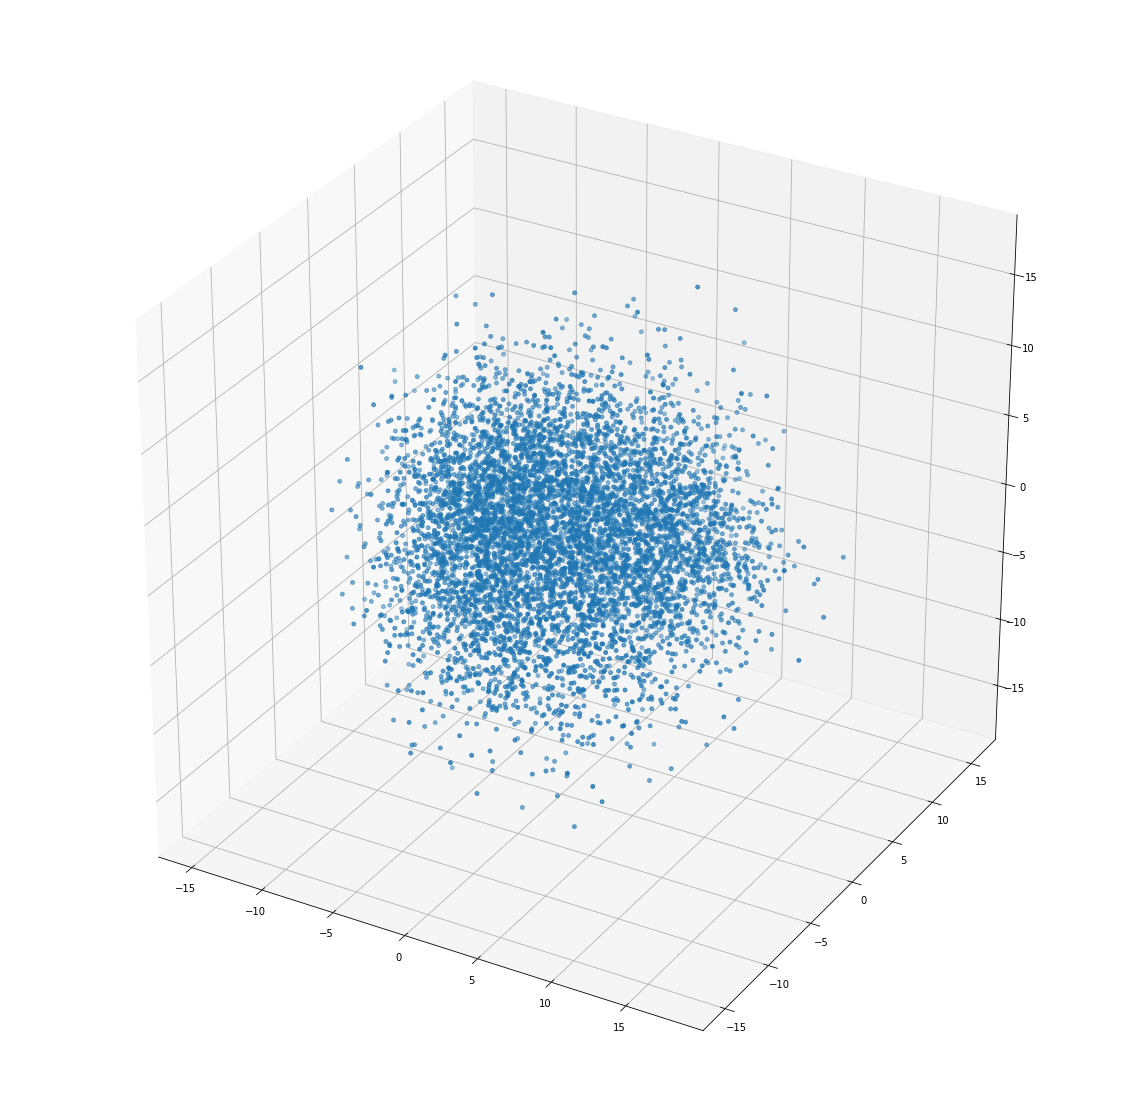

In [301]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

n = 100
xmin, xmax, ymin, ymax, zmin, zmax = min(axis_x) -0.5, max(axis_x)+0.5, min(axis_y)-0.5, max(axis_y)+0.5, min(axis_z)-0.5, max(axis_z)+0.5
cmin, cmax = 0, 2
xs = np.array(axis_x)
ys = np.array(axis_y)
zs = np.array(axis_z)
#color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])

plt.rcParams["figure.figsize"] = (20, 20)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, marker='o', s=15, cmap='Greens')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection = '3d')


data = np.loadtxt()

In [345]:
import matplotlib.pyplot as plt
import plotly
plotly.offline.plot

<function plotly.offline.offline.plot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, output_type='file', include_plotlyjs=True, filename='temp-plot.html', auto_open=True, image=None, image_filename='plot_image', image_width=800, image_height=600, config=None, include_mathjax=False, auto_play=True, animation_opts=None)>

In [365]:
hyeong.head()

,노래,X,Y,Z
0,가거라 삼팔선 - 남인수,9.618243,-1.623715,-2.499435
1,가는 봄 오는 봄 - 최숙자,5.975184,7.802113,-0.884555
2,가는 세월 - 서유석,7.928145,1.781034,3.545405
3,가버린 당신 - 최진희,-0.596783,2.417055,-1.684845
4,가을비 우산속 - 최 헌,2.820990,13.725528,-3.133736


In [39]:
vv = pd.read_csv('music_vector.csv', encoding = 'utf-8')
vv.head()

,TITLE,ARTIST,X,Y,Z
0,가거라 삼팔선,남인수,9.6182,-1.6237,-2.4994
1,가는 봄 오는 봄,최숙자,5.9752,7.8021,-0.8846
2,가는 세월,서유석,7.9281,1.7810,3.5454
3,가버린 당신,최진희,-0.5968,2.4171,-1.6848
4,가을비 우산속,최 헌,2.8210,13.7255,-3.1337


In [44]:
import csv

In [46]:
vv.to_csv('mv.csv', index = False, encoding = 'euc-kr', quoting=csv.QUOTE_NONNUMERIC)

In [43]:
vv

,TITLE,ARTIST,X,Y,Z
0,가거라 삼팔선,남인수,9.6182,-1.6237,-2.4994
1,가는 봄 오는 봄,최숙자,5.9752,7.8021,-0.8846
2,가는 세월,서유석,7.9281,1.7810,3.5454
3,가버린 당신,최진희,-0.5968,2.4171,-1.6848
4,가을비 우산속,최 헌,2.8210,13.7255,-3.1337
5,가을을,패티김,1.3503,10.6202,5.8438
6,가장 무도회,김완선,4.1576,-1.3686,3.1251
7,가지 마오,나훈아,8.1454,1.8718,-0.6172
8,갈대의 순정,박일남,0.8217,8.2454,-7.7171
9,갈 무 리,나훈아,-3.8243,1.3005,-6.9944


In [48]:
koji3 = pd.DataFrame(vv.TITLE + ' - ' + vv.ARTIST, columns=['노래'])
koji3.head()

,노래
0,가거라 삼팔선 - 남인수
1,가는 봄 오는 봄 - 최숙자
2,가는 세월 - 서유석
3,가버린 당신 - 최진희
4,가을비 우산속 - 최 헌


In [49]:
k = vv[['X', 'Y', 'Z']]
fvv = pd.concat([koji3, k], axis =1)
fvv.head()

,노래,X,Y,Z
0,가거라 삼팔선 - 남인수,9.6182,-1.6237,-2.4994
1,가는 봄 오는 봄 - 최숙자,5.9752,7.8021,-0.8846
2,가는 세월 - 서유석,7.9281,1.7810,3.5454
3,가버린 당신 - 최진희,-0.5968,2.4171,-1.6848
4,가을비 우산속 - 최 헌,2.8210,13.7255,-3.1337


In [177]:
fvv.head()

,노래,X,Y,Z
0,가거라 삼팔선 - 남인수,9.6182,-1.6237,-2.4994
1,가는 봄 오는 봄 - 최숙자,5.9752,7.8021,-0.8846
2,가는 세월 - 서유석,7.9281,1.7810,3.5454
3,가버린 당신 - 최진희,-0.5968,2.4171,-1.6848
4,가을비 우산속 - 최 헌,2.8210,13.7255,-3.1337


In [50]:
fvv.to_csv('song_vec.csv', index = False, encoding = 'euc-kr', quoting=csv.QUOTE_NONNUMERIC)

In [52]:
lbled = pd.read_csv('doodle_0821_labeling.csv', engine ='python')

In [176]:
lbled

,TITLE,ARTIST,LYRICS,label,new_BoW,id
0,가거라 삼팔선,남인수,아 산이 막혀\n\n 못오시나요아 물이 막혀\n\n ...,0.0,"['못', '못', '다', '함께', '이', '산', '물', '고향', '땅'...",0
1,가는 봄 오는 봄,최숙자,하늘마저 울던 그날에\n\n 어머님을 이별을 하고원한의 십년 세월\n\n ...,0.0,"['하늘', '그날', '어머님', '이별', '원한', '세월', '눈물', '속...",1
2,가는 세월,서유석,가는 세월 그 누구가\n\n 막을 수가 있나요흘러가는 시냇물을\n\n ...,0.0,"['다', '다', '그', '이', '이', '세월', '시냇물', '아가', '...",2
3,가버린 당신,최진희,잊는다고 생각하면\n\n 또 다시 당신 생각미웁다고 생각하면\n\n ...,1.0,"['또', '다시', '오히려', '모두', '왜', '이렇게', '모두', '왜'...",3
4,가을비 우산속,최 헌,그리움이 눈처럼\n\n 쌓인 거리를나 혼자서 걸었네\n\n ...,1.0,"['왜', '이다지', '또', '다시', '언젠가', '언젠가', '그', '그'...",4
5,가을을,패티김,가을을 남기고\n\n 떠난 사랑겨울은 아직\n\n ...,1.0,"['아직', '멀리', '다시', '멀리', '다시', '멀리', '그', '그',...",5
6,가장 무도회,김완선,해가 지면 거리는\n\n 잿빛 화장하고언제나 표정없는\n\n ...,1.0,"['언제나', '오오', '오오', '오오', '오오', '가장', '오오', '오...",6
7,가지 마오,나훈아,사랑해 사랑해요\n\n 당신을 당신만을이 생명 다 바쳐서\n\n ...,1.0,"['다', '다', '진정', '다', '다', '진정', '한', '오', '한'...",7
8,갈대의 순정,박일남,사나이 우는 마음을\n\n 그 누가 아랴바람에 흔들리는\n\n ...,0.0,"['말없이', '못', '그', '사나이', '마음', '누', '바람', '갈대'...",8
9,갈 무 리,나훈아,내가 왜 이러는지 몰라\n\n 도대체 왜 이런지 몰라꼬집어 말할 순 없어도\n\...,0.0,"['왜', '도대체', '왜', '왜', '정말', '정말', '정말', '오늘',...",9


In [67]:
lbled['id'] = lbled.index

In [72]:
tr_raw = lbled[['id', 'label']]
tr_raw.head()

,id,label
0,0,0.0
1,1,0.0
2,2,0.0
3,3,1.0
4,4,1.0


In [80]:
tr = pd.concat([tr_raw.id, fvv['노래'], fvv[['X', 'Y', 'Z']], tr_raw.label] ,axis = 1)

In [82]:
tr_real = tr[~tr.label.isnull()]

In [87]:
test_raw = tr[tr.label.isnull()]

In [88]:
test_raw.head()

,id,노래,X,Y,Z,label
99,99,나는 울었네 - 손인호,3.9312,5.4168,-4.6528,NaN
100,100,나니미 - 이순길,2.3202,5.1852,-0.6705,NaN
101,101,나를 두고 - 김 훈,5.3980,2.6350,-4.3264,NaN
102,102,나를 잊지 - 김희애,-1.0952,4.9328,-5.7266,NaN
103,103,나만의 것 - 김완선,-3.5662,2.7728,-1.3850,NaN


In [83]:
tr_real.head()

,id,노래,X,Y,Z,label
0,0,가거라 삼팔선 - 남인수,9.6182,-1.6237,-2.4994,0.0
1,1,가는 봄 오는 봄 - 최숙자,5.9752,7.8021,-0.8846,0.0
2,2,가는 세월 - 서유석,7.9281,1.7810,3.5454,0.0
3,3,가버린 당신 - 최진희,-0.5968,2.4171,-1.6848,1.0
4,4,가을비 우산속 - 최 헌,2.8210,13.7255,-3.1337,1.0


In [62]:
train = lbled[~lbled.label.isnull()]
tr = pd.DataFrame(train['label'])

In [63]:
tr.head()

,label
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [162]:
import pandas as pd
from sklearn import neighbors, metrics 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

csv_data = tr_real.iloc[:, 2:5]
csv_label = tr_real.iloc[:, -1]
for_pred = test_raw.iloc[:, 2:5]


# Train Test Split
train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label, test_size=0.2)

######################
# KNN 학습
clf = neighbors.KNeighborsClassifier(n_neighbors=4,  p=2, metric='minkowski')

# 분류기를 정했으니 학습을 시켜주고
clf.fit(train_data, train_label)

# 만들어진 모델을 통해 예측
pred = clf.predict(test_data)

# 정답률 구하기 --- (※5)
acc_score = metrics.accuracy_score(test_label, pred) # 정확도
print("정답률 =", acc_score)
print(confusion_matrix(test_label, pred)) # 교차행렬

정답률 = 0.6884057971014492
[[30  6  1]
 [10 61  4]
 [10 12  4]]


In [163]:
labeled = clf.predict(for_pred)

In [165]:
test_raw['label'] = labeled

C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [166]:
test_raw

,id,노래,X,Y,Z,label
99,99,나는 울었네 - 손인호,3.9312,5.4168,-4.6528,1.0
100,100,나니미 - 이순길,2.3202,5.1852,-0.6705,0.0
101,101,나를 두고 - 김 훈,5.3980,2.6350,-4.3264,0.0
102,102,나를 잊지 - 김희애,-1.0952,4.9328,-5.7266,1.0
103,103,나만의 것 - 김완선,-3.5662,2.7728,-1.3850,1.0
104,104,나의 노래 - 문정선,3.3678,8.4249,-5.3339,1.0
105,105,나침반 - 설운도,1.3093,2.7590,-4.1385,0.0
106,106,나 하나의 사랑 - 송민도,-1.8439,-1.1758,-1.5657,1.0
107,107,낙엽따라 - 차중락,6.3591,5.3907,-0.5796,0.0
108,108,낙엽은 지는데 - 백호빈,0.9839,6.4806,-2.3452,1.0


In [124]:
do = pd.read_csv('song_vec_groupby.csv', engine = 'python')

In [132]:
do.head(10)

,노래,X,Y,Z,LABEL
0,가거라 삼팔선 - 남인수,9.6182,-1.6237,-2.4994,0.0
1,가는 봄 오는 봄 - 최숙자,5.9752,7.8021,-0.8846,0.0
2,가는 세월 - 서유석,7.9281,1.7810,3.5454,0.0
3,가버린 당신 - 최진희,-0.5968,2.4171,-1.6848,1.0
4,가을비 우산속 - 최 헌,2.8210,13.7255,-3.1337,1.0
5,가을을 - 패티김,1.3503,10.6202,5.8438,1.0
6,가장 무도회 - 김완선,4.1576,-1.3686,3.1251,1.0
7,가지 마오 - 나훈아,8.1454,1.8718,-0.6172,1.0
8,갈대의 순정 - 박일남,0.8217,8.2454,-7.7171,0.0
9,갈 무 리 - 나훈아,-3.8243,1.3005,-6.9944,0.0


In [133]:
do.tail(10)

,노래,X,Y,Z,LABEL
6987,How Do I Say - 신화,-1.0447,-2.8586,0.6432,2.0
6988,She's Mine - 휘성&SEVEN;,-3.6295,-4.7211,-3.1973,2.0
6989,4월의 눈물 - 정인호,-6.2257,0.7012,-4.0570,1.0
6990,고백 - 3BOYS,-0.9684,-6.8749,1.7606,1.0
6991,기억해 - 정인호,-4.8124,-4.8589,9.0191,1.0
6992,남자는 속으로 운다 - 전미경,5.6253,7.4279,-10.5500,1.0
6993,내가 - 이수영,4.4831,5.9272,7.7358,1.0
6994,Sweety - 클래지콰이,5.4508,-9.9550,5.4004,2.0
6995,Ring My Bell - 다이나믹 듀오,6.9017,-8.5234,-0.7107,1.0
6996,기억을 흘리다 - 심현보,-4.0446,-4.0057,-3.6593,1.0


In [171]:
tr_raw.label[tr_raw.label.isnull()] = test_raw.label

C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\KO_JIHYEONG\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [175]:
tr_raw.label

,id,label
0,0,0.0
1,1,0.0
2,2,0.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,0.0
9,9,0.0


In [181]:
asdfasdf = pd.read_csv('doodle_0821_labeling.csv', engine = 'python')

In [185]:
len(asdfasdf[~asdfasdf.label.isnull()])

687

In [178]:
fvv['LABEL'] = tr_raw.label

In [180]:
fvv.to_csv('song_vec_groupby.csv', index = False, encoding = 'euc-kr', quoting=csv.QUOTE_NONNUMERIC)

In [1]:
num = [1,2,3]

In [7]:
asdfasdfasdf = [0]*20

In [5]:
import pandas as pd

In [8]:
dtf = pd.DataFrame({'hi': asdfasdfasdf})

In [18]:
dtf.loc[[0,1,2]] = 'hi'

In [19]:
dtf

,hi
0,hi
1,hi
2,hi
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [16]:
num2 = ['1','2','3']
pd.Series(num2)
t = pd.Series(num2).apply(int)
real_t = list(t)

In [17]:
real_t

[1, 2, 3]

0    1
1    2
2    3
dtype: object

In [21]:
sss = pd.read_csv('vec_temp.csv', engine = 'python')

In [22]:
sss.head()

,0,Color,X,Y,Z
0,가거라 삼팔선,r,-1.688597,-3.885234,1.486826
1,가는 봄 오는 봄,r,-4.637153,-2.192509,0.961432
2,가는 세월,r,-3.309196,-1.196960,-0.491862
3,가버린 당신,r,-3.456274,-0.174918,1.317765
4,가을비 우산속,r,-3.969060,-1.621955,-0.466821


In [29]:
temp_sss = pd.DataFrame({'노래' : list(sss['0'])})

In [32]:
vvvv = pd.read_csv('vec_temp2.csv', engine = 'python')

In [33]:
vvvv

,0,Color,X,Y,Z
0,가거라 삼팔선,r,-1.688597,-3.885234,1.486826
1,가는 봄 오는 봄,r,-4.637153,-2.192509,0.961432
2,가는 세월,r,-3.309196,-1.196960,-0.491862
3,가버린 당신,r,-3.456274,-0.174918,1.317765
4,가을비 우산속,r,-3.969060,-1.621955,-0.466821
5,가을을,r,-2.834156,2.347131,1.636096
6,가장 무도회,r,-4.437171,-1.545834,1.568989
7,가지 마오,r,-2.788406,2.485163,4.545239
8,갈대의 순정,r,-4.251839,-1.191894,1.562760
9,갈 무 리,r,-2.199408,0.159518,0.576375


In [40]:
import csv

In [41]:
vvvv.to_csv('C:/Users/KO_JIHYEONG/Desktop/sasasa.csv',  encoding = 'euc-kr', quoting=csv.QUOTE_NONNUMERIC)

In [87]:
len(vvvv)

6302

In [44]:
vvvvvv = pd.read_csv('song_vec_groupby.csv', engine = 'python')

In [59]:
v6 = pd.read_csv('music_vector.csv', engine = 'python', encoding = 'utf-8')

In [61]:
v6['label'] = vvvvvv.LABEL

In [68]:
n6302 = list(vvvv['0'])

In [72]:
n6997 = list(v6.TITLE)
l6997 = list(v6.label)

In [73]:
idx_list = []
for (idx, x) in enumerate(n6302):
    if x in n6997:
        idx_list.append(idx)

In [76]:
new_v6 = v6.loc[idx_list]

In [77]:
new_v6.head

,TITLE,ARTIST,X,Y,Z,label
0,가거라 삼팔선,남인수,9.6182,-1.6237,-2.4994,0.0
1,가는 봄 오는 봄,최숙자,5.9752,7.8021,-0.8846,0.0
2,가는 세월,서유석,7.9281,1.7810,3.5454,0.0
3,가버린 당신,최진희,-0.5968,2.4171,-1.6848,1.0
4,가을비 우산속,최 헌,2.8210,13.7255,-3.1337,1.0


In [89]:
len(new)

12604

In [78]:
new_v6.iloc[:, [0,1,-1]]

,TITLE,ARTIST,label
0,가거라 삼팔선,남인수,0.0
1,가는 봄 오는 봄,최숙자,0.0
2,가는 세월,서유석,0.0
3,가버린 당신,최진희,1.0
4,가을비 우산속,최 헌,1.0
5,가을을,패티김,1.0
6,가장 무도회,김완선,1.0
7,가지 마오,나훈아,1.0
8,갈대의 순정,박일남,0.0
9,갈 무 리,나훈아,0.0


In [90]:
new = pd.concat([new_v6.iloc[:, [0,1,-1]], vvvv['Color']], axis = 1)

In [91]:
new.head()

,TITLE,ARTIST,label,Color
0,가거라 삼팔선,남인수,0.0,r
1,가는 봄 오는 봄,최숙자,0.0,r
2,가는 세월,서유석,0.0,r
3,가버린 당신,최진희,1.0,r
4,가을비 우산속,최 헌,1.0,r


In [86]:
new['Color'] = list(vvvv.Color)

ValueError: Length of values does not match length of index

In [52]:
titles = []
for tt in range(len(vvvvvv['노래'])):
    titles.append(vvvvvv['노래'][tt].split(' - '))

AttributeError: 'float' object has no attribute 'split'

In [56]:
vvvvvv['노래'][3]

'가버린 당신 - 최진희'

In [96]:
new.to_csv('gaza.csv', encoding = 'euc-kr', quoting=csv.QUOTE_NONNUMERIC)

In [94]:
new = pd.concat([new, vvvv[['X', 'Y', 'Z']]], axis =1)

In [95]:
new.head()

,TITLE,ARTIST,label,Color,X,Y,Z
0,가거라 삼팔선,남인수,0.0,r,-1.688597,-3.885234,1.486826
1,가는 봄 오는 봄,최숙자,0.0,r,-4.637153,-2.192509,0.961432
2,가는 세월,서유석,0.0,r,-3.309196,-1.196960,-0.491862
3,가버린 당신,최진희,1.0,r,-3.456274,-0.174918,1.317765
4,가을비 우산속,최 헌,1.0,r,-3.969060,-1.621955,-0.466821


In [97]:
do = pd.read_csv('doodle.csv', engine = 'python')

In [100]:
with_lyrics = do

In [101]:
with_lyrics.head(20)

,TITLE,ARTIST,LYRICS
0,가거라 삼팔선,남인수,아 산이 막혀\n 못오시나요아 물이 막혀\n 못오...
1,가는 봄 오는 봄,최숙자,하늘마저 울던 그날에\n 어머님을 이별을 하고원한의 십년 세월\n ...
2,가는 세월,서유석,가는 세월 그 누구가\n 막을 수가 있나요흘러가는 시냇물을\n ...
3,가버린 당신,최진희,잊는다고 생각하면\n 또 다시 당신 생각미웁다고 생각하면\n 오히...
4,가을비 우산속,최 헌,그리움이 눈처럼\n 쌓인 거리를나 혼자서 걸었네\n ...
5,가을을,패티김,가을을 남기고\n 떠난 사랑겨울은 아직\n ...
6,가장 무도회,김완선,해가 지면 거리는\n 잿빛 화장하고언제나 표정없는\n ...
7,가지 마오,나훈아,사랑해 사랑해요\n 당신을 당신만을이 생명 다 바쳐서\n 이 ...
8,갈대의 순정,박일남,사나이 우는 마음을\n 그 누가 아랴바람에 흔들리는\n ...
9,갈 무 리,나훈아,내가 왜 이러는지 몰라\n 도대체 왜 이런지 몰라꼬집어 말할 순 없어도\n ...


In [103]:
from konlpy.tag import Kkma
kkma = Kkma()

In [104]:
do = pd.read_csv('doodle_0821.csv', engine = 'python')

In [108]:
JJo_Gae = do

In [109]:
JJo_Gae.head(15)

,TITLE,ARTIST,LYRICS,BoW,new_BoW
0,가거라 삼팔선,남인수,아 산이 막혀\n\n 못오시나요아 물이 막혀\n\n ...,"['산', '물', '고향', '고향땅', '땅', '남북', '원한', '천리길'...","['못', '못', '다', '함께', '이', '산', '물', '고향', '땅'..."
1,가는 봄 오는 봄,최숙자,하늘마저 울던 그날에\n\n 어머님을 이별을 하고원한의 십년 세월\n\n ...,"['하늘', '그날', '어머님', '이별', '원한', '십', '십년', '년'...","['하늘', '그날', '어머님', '이별', '원한', '세월', '눈물', '속..."
2,가는 세월,서유석,가는 세월 그 누구가\n\n 막을 수가 있나요흘러가는 시냇물을\n\n ...,"['세월', '누구', '수', '시냇물', '아가', '어른', '슬픔', '행복...","['다', '다', '그', '이', '이', '세월', '시냇물', '아가', '..."
3,가버린 당신,최진희,잊는다고 생각하면\n\n 또 다시 당신 생각미웁다고 생각하면\n\n ...,"['생각', '당신', '얼굴', '사람', '모두', '부', '사랑', '순간'...","['또', '다시', '오히려', '모두', '왜', '이렇게', '모두', '왜'..."
4,가을비 우산속,최 헌,그리움이 눈처럼\n\n 쌓인 거리를나 혼자서 걸었네\n\n ...,"['그리움', '눈', '거리', '나', '혼자', '미련', '미련때문', '때...","['왜', '이다지', '또', '다시', '언젠가', '언젠가', '그', '그'..."
5,가을을,패티김,가을을 남기고\n\n 떠난 사랑겨울은 아직\n\n ...,"['가을', '사랑', '사랑겨울', '겨울', '수록', '슬픔', '눈물', '...","['아직', '멀리', '다시', '멀리', '다시', '멀리', '그', '그',..."
6,가장 무도회,김완선,해가 지면 거리는\n\n 잿빛 화장하고언제나 표정없는\n\n ...,"['해', '지면', '거리', '잿빛', '화장', '표정', '얼굴', '사랑'...","['언제나', '오오', '오오', '오오', '오오', '가장', '오오', '오..."
7,가지 마오,나훈아,사랑해 사랑해요\n\n 당신을 당신만을이 생명 다 바쳐서\n\n ...,"['사랑', '당신', '생명', '목숨', '내', '가지', '가지마', '마'...","['다', '다', '진정', '다', '다', '진정', '한', '오', '한'..."
8,갈대의 순정,박일남,사나이 우는 마음을\n\n 그 누가 아랴바람에 흔들리는\n\n ...,"['사나이', '마음', '누', '바람', '갈대', '순정', '순정사랑', '...","['말없이', '못', '그', '사나이', '마음', '누', '바람', '갈대'..."
9,갈 무 리,나훈아,내가 왜 이러는지 몰라\n\n 도대체 왜 이런지 몰라꼬집어 말할 순 없어도\n\...,"['나', '순', '맘', '나도', '줄', '이제', '남인', '줄', '눈...","['왜', '도대체', '왜', '왜', '정말', '정말', '정말', '오늘',..."
